In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [10]:
d = fetch_california_housing()

X = pd.DataFrame(d.data, columns=d.feature_names)
y = pd.Series(d.target, name="Price")

In [14]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2, 
    random_state = 42
)

In [19]:
## standardize

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [20]:
from sklearn.linear_model import LinearRegression

## cross validation
from sklearn.model_selection import cross_val_score

In [30]:
regression = LinearRegression()
regression.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [31]:
mse = cross_val_score(regression,x_train, y_train, scoring="neg_mean_squared_error", cv=10)
print(np.mean(mse))

-0.5196355647645039


In [33]:
# prediction
reg_predict = regression.predict(x_test)

In [34]:
print(reg_predict)

[0.70298353 1.75471768 2.72096393 ... 4.59369185 1.23349985 1.99958305]


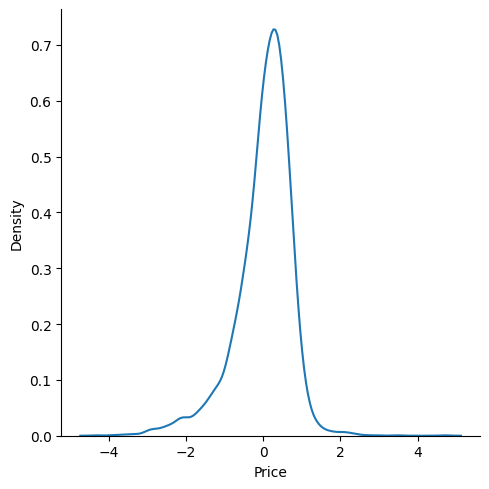

In [36]:
import seaborn as sns
sns.displot(reg_predict-y_test, kind='kde')

In [38]:
from sklearn.metrics import r2_score
score = r2_score(reg_predict, y_test)
print(score)

0.3843323351781065
